In [1]:
import pandas as pd,numpy as np

In [2]:
import sys
print(sys.platform)

linux


In [3]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import random


Using TensorFlow backend.


In [4]:
os.getcwd()

'/home/roshanbtech/Untitled Folder'

In [5]:
import zipfile
import os
# zf = zipfile.ZipFile('train.zip') # having First.csv zipped file.
# df = pd.read_csv(zf.open('First.csv'))

# with zipfile.ZipFile('/home/roshanbtech/Untitled Folder/train.zip', 'r') as zip_ref:
#     zip_ref.extractall('/home/roshanbtech/Untitled Folder')


In [6]:
# with zipfile.ZipFile('/home/roshanbtech/Untitled Folder/test1.zip', 'r') as zip_ref:
#     zip_ref.extractall('/home/roshanbtech/Untitled Folder')


In [7]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
BATCH_SIZE = 50

In [8]:
filenames = os.listdir("/home/roshanbtech/Untitled Folder/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [9]:
df.sample(5)

,filename,category
2251,dog.10795.jpg,1
24183,dog.289.jpg,1
21989,dog.10833.jpg,1
10800,cat.10691.jpg,0
19717,cat.7901.jpg,0


In [10]:
sample = random.choice(filenames)

In [11]:
sample
import cv2

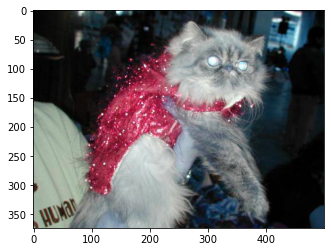

In [12]:
image = cv2.imread('/home/roshanbtech/Untitled Folder/train/'+ sample)
plt.imshow(image)

In [13]:
print(image.size)

561000


In [14]:

height = []
width = []
for file in filenames:
    image = load_img('/home/roshanbtech/Untitled Folder/train/'+ file)
    width.append(image.size[0])
    height.append(image.size[1])
    
    

In [15]:
print(max(height) , min( height) , max(width),min(width))

768 32 1050 42


In [16]:
size = pd.DataFrame(list(zip(width,height)),columns=['width','height'])

In [17]:
size.head()

,width,height
0,332,370
1,500,422
2,500,332
3,350,337
4,500,374


In [18]:
size.describe()

,width,height
count,25000.00000,25000.000000
mean,404.09904,360.478080
std,109.03793,97.019959
min,42.00000,32.000000
25%,323.00000,301.000000
50%,447.00000,374.000000
75%,499.00000,421.000000
max,1050.00000,768.000000


In [19]:
df['category'] = df['category'].replace({0:'cat', 1: 'dog'})

In [20]:
train_df , validate_df = train_test_split(df,test_size = 0.2, random_state= 101)

In [21]:
train_df = train_df.reset_index(drop = True)

In [22]:
validate_df = validate_df.reset_index(drop=True)

In [23]:
train_df.shape

(20000, 2)

In [24]:
validate_df.shape

(5000, 2)

In [25]:

df.head(2)

,filename,category
0,dog.3671.jpg,dog
1,dog.3111.jpg,dog


In [26]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/home/roshanbtech/Untitled Folder/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE 
)


Found 20000 validated image filenames belonging to 2 classes.


In [27]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/home/roshanbtech/Untitled Folder/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)


Found 5000 validated image filenames belonging to 2 classes.


In [28]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/home/roshanbtech/Untitled Folder/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)



Found 1 validated image filenames belonging to 1 classes.


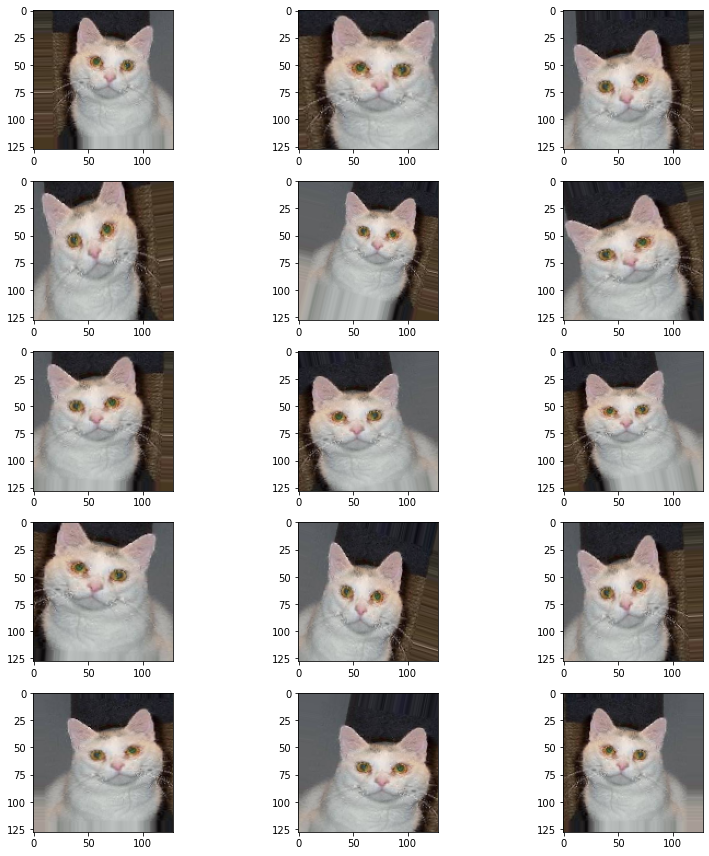

In [29]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()


In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization


In [31]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
______________________________________

In [32]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [33]:
epochs = 5


In [34]:
%%time
nn_model = model.fit_generator(train_generator,epochs = epochs,validation_data= validation_generator,
                               validation_steps= (total_validate)//BATCH_SIZE ,
                              steps_per_epoch= total_train // BATCH_SIZE)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.3 µs

Epoch 1/5
400/400 [==============================] - 606s 2s/step - loss: 0.7812 - accuracy: 0.6452 - val_loss: 0.6498 - val_accuracy: 0.6096
Epoch 2/5
400/400 [==============================] - 606s 2s/step - loss: 0.5128 - accuracy: 0.7520 - val_loss: 0.3743 - val_accuracy: 0.7838
Epoch 3/5
400/400 [==============================] - 606s 2s/step - loss: 0.4503 - accuracy: 0.7881 - val_loss: 0.4374 - val_accuracy: 0.8268
Epoch 4/5
400/400 [==============================] - 595s 1s/step - loss: 0.4119 - accuracy: 0.8114 - val_loss: 0.6152 - val_accuracy: 0.8132
Epoch 5/5
400/400 [==============================] - 595s 1s/step - loss: 0.3830 - accuracy: 0.8275 - val_loss: 0.3611 - val_accuracy: 0.8520


In [35]:
model.save_weights("model1.h5")


In [36]:
model.save('model1.h5')

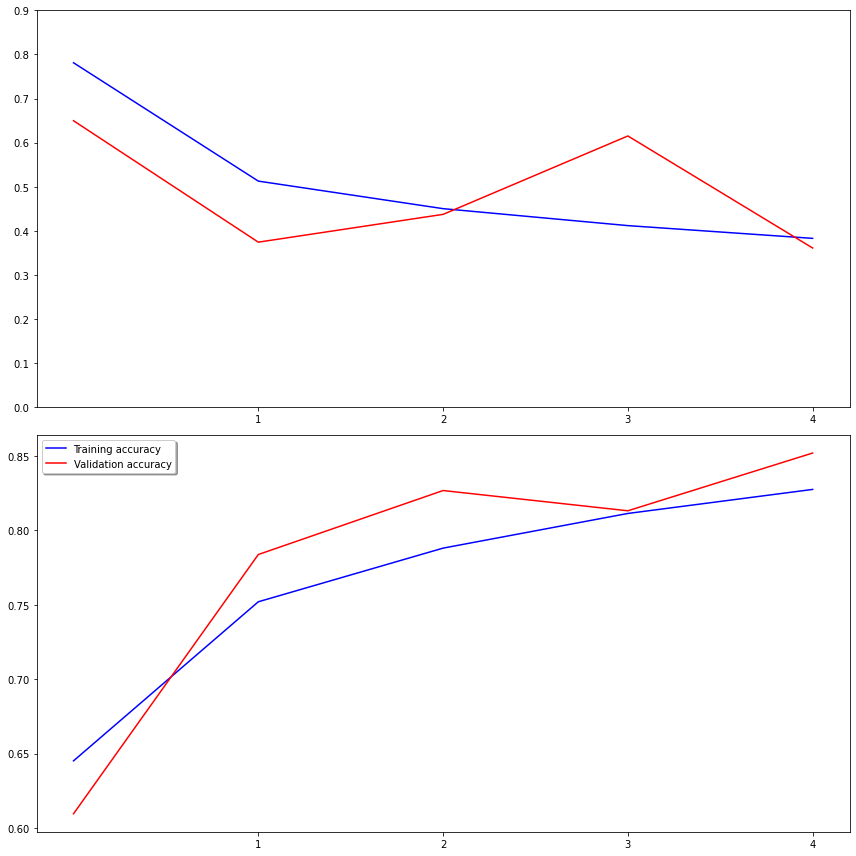

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(nn_model.history['loss'], color='b', label="Training loss")
ax1.plot(nn_model.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(nn_model.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(nn_model.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [38]:
test_filenames = os.listdir("/home/roshanbtech/Untitled Folder/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [39]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/home/roshanbtech/Untitled Folder/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False )

Found 12500 validated image filenames.


In [40]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/BATCH_SIZE))

In [41]:
test_df.head()

,filename
0,9241.jpg
1,11900.jpg
2,12110.jpg
3,12347.jpg
4,12293.jpg


In [42]:
# For categoral classication the prediction will come with probability of each category. 
# So we will pick the category that have the highest probability with numpy average max
test_df['category'] = np.argmax(predict,axis = -1)

In [43]:
test_df.head()

,filename,category
0,9241.jpg,1
1,11900.jpg,0
2,12110.jpg,0
3,12347.jpg,1
4,12293.jpg,1


In [44]:
# label_map = dict((j,i) for i,j in train_generator.class_indices.items())

In [45]:
label_map

NameError: name 'label_map' is not defined

In [ ]:
test_df['category'] = test_df['category'].map({0: 'cat', 1: 'dog'})

In [ ]:
test_df.head()

In [ ]:
test_df['category'] = test_df['category'].map({'cat': 0, 'dog': 1})

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/home/roshanbtech/Untitled Folder/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df.head()